In [58]:
# Your code here
#Identifying the data
import pandas as pd
import matplotlib.pyplot as plt
# Read your dataset into a DataFrame
df = pd.read_csv('data/measurements.csv') 
df2 = pd.read_excel('data/measurements2.xlsx')

In [48]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [49]:
df2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [50]:
data = pd.concat([df,df2],axis=0)
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [51]:
duplicates = data.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
383    False
384    False
385    False
386    False
387    False
Length: 776, dtype: bool

In [52]:
data = data.drop_duplicates()

In [53]:
data.to_csv('data/m_clean_measurements.csv', index=False)

In [62]:
# Correct data types for columns
# Convert 'consume', 'temp_inside', 'temp_outside' from string to numeric in the CSV data if necessary
for col in ['consume', 'temp_inside', 'temp_outside']:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.').astype(float)


In [67]:

# Handle missing values
# For columns with significant missing values, we'll fill with the median or mode as appropriate

# Fill 'temp_inside' with median
data['temp_inside'].fillna(data['temp_inside'].median(), inplace=True)

# 'specials' and 'refill gas' can be filled with a placeholder or mode
data['specials'].fillna('none', inplace=True)
data['refill gas'].fillna('unknown', inplace=True)


In [68]:

# Drop rows where 'consume' or 'speed' are missing, as these are key variables
data.dropna(subset=['consume', 'speed'], inplace=True)


In [70]:

# Display summary statistics
summary_stats_cleaned = data.describe(include='all')
print(summary_stats_cleaned)

# Display missing values after cleaning
missing_values_after_cleaning = data.isnull().sum()
print(missing_values_after_cleaning)


          distance     consume       speed  temp_inside  temp_outside  \
count   388.000000  388.000000  388.000000   388.000000    388.000000   
unique         NaN         NaN         NaN          NaN           NaN   
top            NaN         NaN         NaN          NaN           NaN   
freq           NaN         NaN         NaN          NaN           NaN   
mean     19.652835    4.912371   41.927835    21.931701     11.358247   
std      22.667837    1.033172   13.598524     0.994741      6.991542   
min       1.300000    3.300000   14.000000    19.000000     -5.000000   
25%      11.800000    4.300000   32.750000    21.500000      7.000000   
50%      14.600000    4.700000   40.500000    22.000000     10.000000   
75%      19.000000    5.300000   50.000000    22.500000     16.000000   
max     216.100000   12.200000   90.000000    25.500000     31.000000   

       specials gas_type          AC        rain         sun  refill liters  \
count       388      388  388.000000  388.00

Text(0, 0.5, 'Frequency')

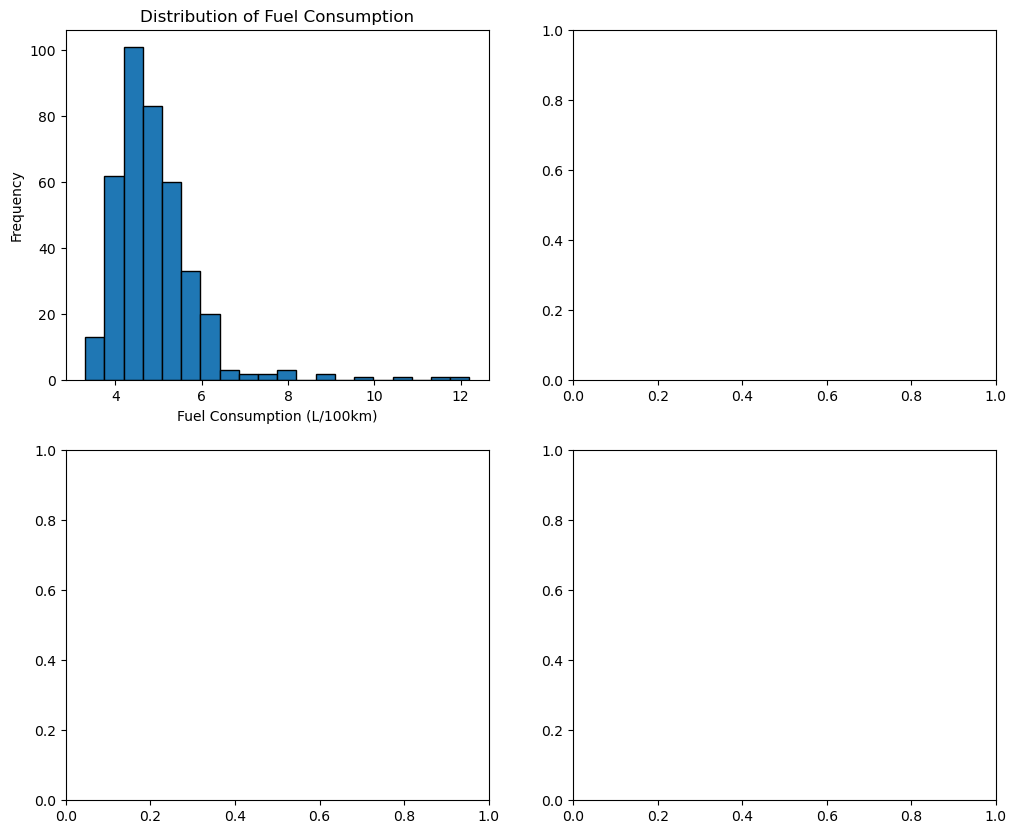

In [69]:

# Create histograms for key variables
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for 'consume'
axs[0, 0].hist(data['consume'], bins=20, edgecolor='black')
axs[0, 0].set_title('Distribution of Fuel Consumption')
axs[0, 0].set_xlabel('Fuel Consumption (L/100km)')
axs[0, 0].set_ylabel('Frequency')


In [71]:

# Histogram for 'speed'
axs[0, 1].hist(data['speed'], bins=20, edgecolor='black')
axs[0, 1].set_title('Distribution of Speed')
axs[0, 1].set_xlabel('Speed (km/h)')
axs[0, 1].set_ylabel('Frequency')


Text(535.7727272727271, 0.5, 'Frequency')

In [72]:

# Histogram for 'temp_inside'
axs[1, 0].hist(data['temp_inside'], bins=20, edgecolor='black')
axs[1, 0].set_title('Distribution of Inside Temperature')
axs[1, 0].set_xlabel('Temperature Inside (°C)')
axs[1, 0].set_ylabel('Frequency')


Text(28.499999999999993, 0.5, 'Frequency')

In [74]:

# Histogram for 'temp_outside'
axs[1, 1].hist(data['temp_outside'], bins=20, edgecolor='black')
axs[1, 1].set_title('Distribution of Outside Temperature')
axs[1, 1].set_xlabel('Temperature Outside (°C)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>